##  Анализ главных компонент (PCA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


ds_wine = load_wine()
df_wine = pd.DataFrame(ds_wine.data, columns=ds_wine.feature_names)

X = df_wine.values
y = ds_wine.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


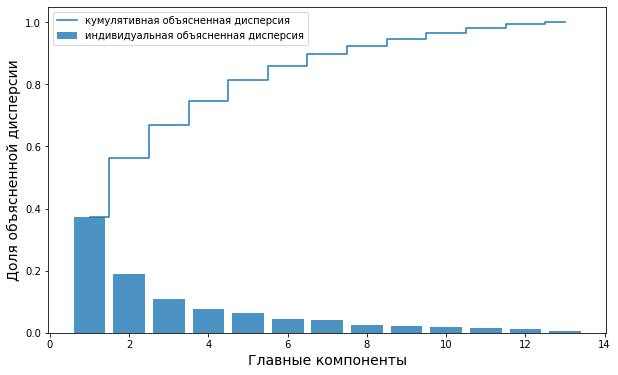

In [2]:
from sklearn.decomposition import PCA


pca = PCA(n_components=None)
pca.fit(X_train_std)
cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10,6))
plt.bar(range(1, 14), pca.explained_variance_ratio_, 
        alpha=0.8,
        align='center',
        label='индивидуальная объясненная дисперсия')
plt.step(range(1, 14), cum_var, 
         where='mid', 
         label='кумулятивная объясненная дисперсия')
plt.legend()
plt.xlabel('Главные компоненты', fontsize=14)
plt.ylabel('Дoля объясненной дисперсии', fontsize=14)
plt.show()

Из графика видно, что примерно 80% дисперсии объясняется пятью первыми компонентами. То есть, для сохранения информативности признаков отбора 5-ти компонент достаточно.\
Для 2D-визуализации выберем первые 2 компоненты, выделяющие ~60% дисперсии.

In [3]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
pca.explained_variance_ratio_

array([0.37329648, 0.18818926])

Проведем классификацию образцов вин в сжатом признаковом пространстве с помощью логистической регрессии.

In [4]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()
lr.fit(X_train_pca, y_train)
y_train_pred = lr.predict(X_train_pca)
y_test_pred = lr.predict(X_test_pca)

In [5]:
def plot_scatter_data(X, y, ax=plt, title=None, xy_labels=[None, None]):
    """Функция выводит scatter-plot c маркировкой для трех классов."""
    
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'green')
    for i, cl in enumerate(np.unique(y)):
        ax.scatter(X[y == cl,0], 
                   X[y == cl,1], 
                   alpha=0.6,
                   s=80,
                   c=colors[i], 
                   marker=markers[i], 
                   label='класс {}'.format(cl))
        ax.set_title(title, fontsize=14)
        ax.set_xlabel(xy_labels[0])
        ax.set_ylabel(xy_labels[1])
        ax.legend()

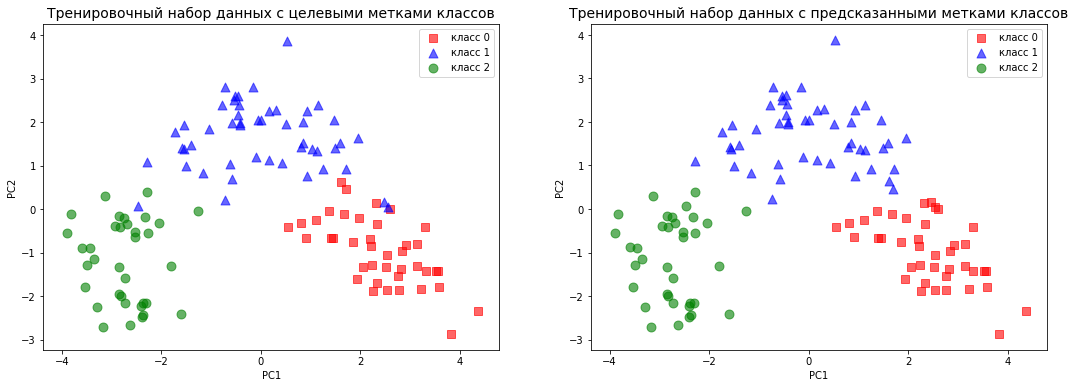

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
xy_labels = ['PC1', 'PC2']
title1 = 'Тренировочный набор данных с целевыми метками классов'
plot_scatter_data(X_train_pca, y_train, ax[0], title1, xy_labels)
title2 = 'Тренировочный набор данных с предсказанными метками классов'
plot_scatter_data(X_train_pca, y_train_pred, ax[1], title2, xy_labels)

Как видно, ошибочно классифицированы 5 образцов.

In [7]:
from sklearn.metrics import accuracy_score


print('Accuracy train data: %.3f' % accuracy_score(y_train, y_train_pred))

Accuracy train data: 0.960


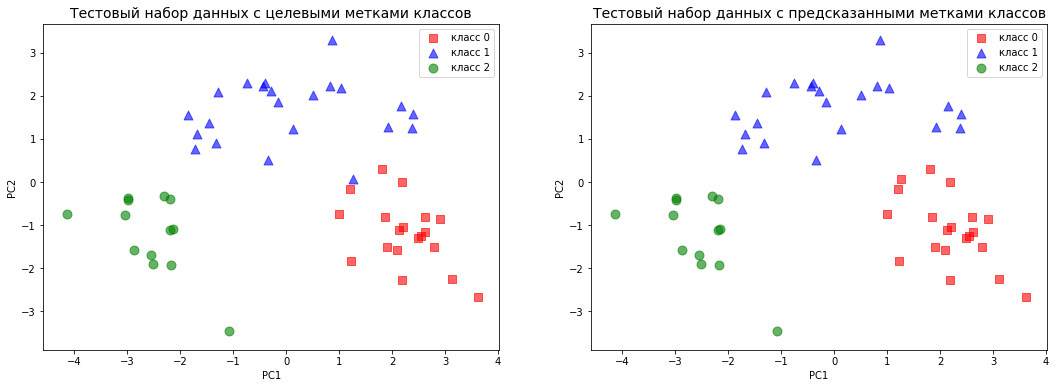

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
title1 = 'Тестовый набор данных с целевыми метками классов'
plot_scatter_data(X_test_pca, y_test, ax[0], title1, xy_labels)
title2 = 'Тестовый набор данных с предсказанными метками классов'
plot_scatter_data(X_test_pca, y_test_pred, ax[1], title2, xy_labels)

In [9]:
print('Accuracy test data: %.3f' % accuracy_score(y_test, y_test_pred))

Accuracy test data: 0.981


## Линейный дискриминантный анализ (LDA)

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


lda = LinearDiscriminantAnalysis(n_components=None, store_covariance=True)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

In [11]:
lda.explained_variance_ratio_

array([0.73846314, 0.26153686])

In [12]:
lr = LogisticRegression()
lr.fit(X_train_lda , y_train)
y_train_pred = lr.predict(X_train_lda)
y_test_pred = lr.predict(X_test_lda)

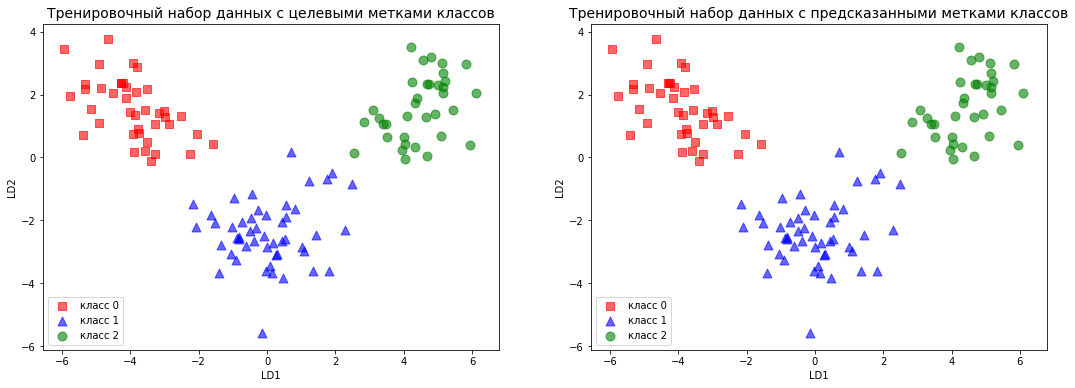

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
xy_labels = ['LD1', 'LD2']
title1 = 'Тренировочный набор данных с целевыми метками классов'
plot_scatter_data(X_train_lda, y_train, ax[0], title1, xy_labels)
title2 = 'Тренировочный набор данных с предсказанными метками классов'
plot_scatter_data(X_train_lda, y_train_pred, ax[1], title2, xy_labels)

Видно, что в новом признаковом пространстве все 3 класса вин линейно разделимы, и модель логистической регрессии классифицирует сорта вин без ошибок.

In [14]:
print('Accuracy train data: %.3f' % accuracy_score(y_train, y_train_pred))

Accuracy train data: 1.000


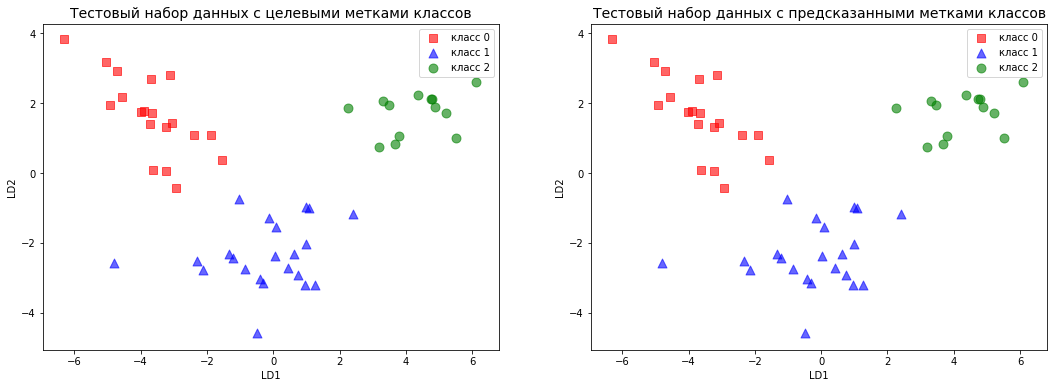

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
title1 = 'Тестовый набор данных с целевыми метками классов'
plot_scatter_data(X_test_lda, y_test, ax[0], title1, xy_labels)
title2 = 'Тестовый набор данных с предсказанными метками классов'
plot_scatter_data(X_test_lda, y_test_pred, ax[1], title2, xy_labels)

In [16]:
print('Accuracy test data: %.3f' % accuracy_score(y_test, y_test_pred))

Accuracy test data: 1.000


На тестовом наборе даных логистическая регрессия также демонстрирует безошибочную классификацию.